This Notebook contains EDA for Project 2 of DATASCI 200 that examines the influence of geographic and socioeconomic factors on one's reported happiness. This report concerns itself with two datasets: 
1\) 2005-Present World Happiness Report 
2\) S&P 500 Index Market Trend Data

First we will start by loading in the two datasets:

In [ ]:
# Load in both datasets as pandas data frames

# Before we do that, we must import the proper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load in the Wold Happiness report dataset
world_happiness = pd.read_csv('WorldHappinessReport.csv')

# Load in the S&P500 Index Trend Data
SP_Data = pd.read_csv('S&P500Data.csv')

In [ ]:
# Check the size of the World Happiness report data
print(world_happiness.shape)

In [28]:
# Examine the World Happiness report data
print(world_happiness.head())

  Country Name Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
0  Afghanistan         South Asia  2008     3.723590            7.350416   
1  Afghanistan         South Asia  2009     4.401778            7.508646   
2  Afghanistan         South Asia  2010     4.758381            7.613900   
3  Afghanistan         South Asia  2011     3.831719            7.581259   
4  Afghanistan         South Asia  2012     3.782938            7.660506   

   Social Support  Healthy Life Expectancy At Birth  \
0        0.450662                         50.500000   
1        0.552308                         50.799999   
2        0.539075                         51.099998   
3        0.521104                         51.400002   
4        0.520637                         51.700001   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                      0.718114    0.167652                   0.881686   
1                      0.678896    0.190809                   0.

In [29]:
# Check the size of the S&P500 dataset
print(SP_Data.shape)

(2541, 6)


In [30]:
# Examine the S&P500 Index Trend Data
print(SP_Data.head())

         Date  Close/Last Volume     Open     High      Low
0  04/14/2023     4137.64     --  4140.11  4163.19  4113.20
1  04/13/2023     4146.22     --  4100.04  4150.26  4099.40
2  04/12/2023     4091.95     --  4121.72  4134.37  4086.94
3  04/11/2023     4108.94     --  4110.29  4124.26  4102.61
4  04/10/2023     4109.11     --  4085.20  4109.50  4072.55


In [31]:
# We see that the volume column is empty, so we will remove that column
SP_Data = SP_Data.drop('Volume', axis=1)

# Verify that column was dropped
print(SP_Data.head())

         Date  Close/Last     Open     High      Low
0  04/14/2023     4137.64  4140.11  4163.19  4113.20
1  04/13/2023     4146.22  4100.04  4150.26  4099.40
2  04/12/2023     4091.95  4121.72  4134.37  4086.94
3  04/11/2023     4108.94  4110.29  4124.26  4102.61
4  04/10/2023     4109.11  4085.20  4109.50  4072.55


We notice that the two datasets have different sizes, namely a different number of rows. This does not necessarily mean that the date ranges are different (although this is something we should check), since data is tablulated by country and by year in the world happiness report. 

In [32]:
# Now we will filter the data to ensure that the data ranges are consistent across the two datasets. 
# To do so, we will first convert the dates contained with the date data of the S&P 500 data:
SP_Data['Date'] = pd.to_datetime(SP_Data['Date'])

In [33]:
# Since the data in the World Happiness Dataset starts in 2005, we will filter out all data from the S&P 500 dataset that does not fall after 2005:
cutoff_date = pd.to_datetime('2005-01-01')
SP_Data = SP_Data.loc[SP_Data['Date'] >= cutoff_date]
print(SP_Data.shape)

(2541, 5)


In [34]:
# Since there was no change in the size of the data from the previous secting, we realize that the S&P 500 dataset must cover a different date range.
# We will first indentify earliest data contained within the S&P 500 dataset
print(SP_Data['Date'].min())

2013-04-16 00:00:00


In [35]:
# Since the earliest data in the S&P500 dataset is 2013 and is not the start of the year, we will remove all data prior to 2014 
# for both datasets so that we are comparing the same timeframe and full-year intervals for consistency across both datasets:
cutoff_date_start = pd.to_datetime('2014-01-01')
SP_Data = SP_Data.loc[SP_Data['Date'] >= cutoff_date_start]
print(SP_Data.shape)

(2355, 5)


We see that reduced the size of the datset, now we will filter the data contained in the World Happiness set to include the same range:

In [36]:
# we will remove all rows of data in the world happiness dataset that are before 2014:
cutoff_year = 2014
world_happiness = world_happiness.loc[world_happiness['Year'] >= cutoff_year]
print(world_happiness.shape)

(1210, 13)


Now we will compare the most recent data from both datasets to ensure compatibility:

In [37]:
# Let us pull the most recent data from both datasets to ensure compatibility:
SP_Data_sorted = SP_Data.sort_values('Date', ascending=False)
world_happiness_sorted = world_happiness.sort_values('Year', ascending=False)

# Take the first row of the sorted dataframe to find the latest date:
print(SP_Data_sorted.iloc[0])
print(world_happiness_sorted.iloc[0])


Date          2023-04-14 00:00:00
Close/Last                4137.64
Open                      4140.11
High                      4163.19
Low                        4113.2
Name: 0, dtype: object
Country Name                                   Zimbabwe
Regional Indicator                   Sub-Saharan Africa
Year                                               2022
Life Ladder                                     3.29622
Log GDP Per Capita                             7.670123
Social Support                                 0.666172
Healthy Life Expectancy At Birth              54.525002
Freedom To Make Life Choices                   0.651987
Generosity                                    -0.069513
Perceptions Of Corruption                      0.752632
Positive Affect                                0.640609
Negative Affect                                 0.19135
Confidence In National Government                   NaN
Name: 2198, dtype: object


From the output, we see that the S&P 500 index dataset contains data up to the date that the dataset was downloaded (4-14-23), while the World Happiness Dataset contains data until the year 2022. To reconcile this, we will remove all data that is after the end of 2022 in the S&P 500 index dataset.

In [38]:
# Remove all data after the end of 2022
cutoff_date_end = pd.to_datetime('2023-01-01')
SP_Data = SP_Data.loc[SP_Data['Date'] < cutoff_date_end]
print(SP_Data.shape)

(2284, 5)


We see that this has significantly reduced the size of the dataset. Fortunately, we can now compare the two datasets more effectively. We are going to zero-in on the S&P 500 dataset in order to generate yearly metrics that can be used alongside the yearly data contained in the World Happiness Dataset. These metrics will do two things:
1\) Identify when recessions and economic upturns may have occurred within the data
2\) Identify volatility in the market using the data

To do this we will apply the concept of Bollinger Bands, which is a common tool used in the financial industry to indentify cyclical trends in the market. They are constructed using a moving average of prices (a 20-day window is commonly chosen) and two standard deviations of the prices above and below the moving average.

In [42]:
# Calculate the Bollinger Bands for the S&P 500 data:

# First calculate the moving average
SP_Data['Moving Average - 20 day'] = SP_Data['Close/Last'].rolling(window=20).mean()

# Now caculate the standard deviation
SP_Data['Standard Deviation - 20 day'] = SP_Data['Close/Last'].rolling(window=20).std()

# Calculate the upper and lower Bollinger Bands
SP_Data['Upper Bollinger Band'] = SP_Data['Moving Average - 20 day'] + (2 * SP_Data['Standard Deviation - 20 day'])
SP_Data['Lower Bollinger Band'] = SP_Data['Moving Average - 20 day'] - (2 * SP_Data['Standard Deviation - 20 day'])

Now we will form yearly metrics using the Bollinger Bands:

In [43]:
# Calculate the number of times the S&P index breaks above/below the Bollinger Bands for each year

# Extract year from the date field
SP_Data['Year'] = SP_Data['Date'].dt.year

# Compare to see if each data point lies outside the Bollinger Bands
SP_Data['Above Band'] = SP_Data['Close/Last'] > SP_Data['Upper Bollinger Band']
SP_Data['Below Band'] = SP_Data['Close/Last'] < SP_Data['Lower Bollinger Band']

# Sum on a yearly basis
Yearly_Above_Band = SP_Data.groupby('Year')['Above Band'].sum()
Yearly_Below_Band = SP_Data.groupby('Year')['Below Band'].sum()

print("Above:\n ", Yearly_Above_Band)
print("Below:\n ", Yearly_Below_Band)

Above:
  Year
2014     0
2015     8
2016     4
2017     3
2018     5
2019     4
2020     6
2021     0
2022    15
Name: Above Band, dtype: int64
Below:
  Year
2014    28
2015    18
2016    31
2017    33
2018    17
2019    26
2020    19
2021    25
2022    10
Name: Below Band, dtype: int64


In [44]:
# Calculate the Bollinger Bandwidth to form a yearly metric for volatility

# Calculate the Bollinger Bandwidth for each year
SP_Data['Bollinger Bandwidth'] = (SP_Data['Upper Bollinger Band'] - SP_Data['Lower Bollinger Band']) / SP_Data['Moving Average - 20 day']
SP_Data_Yearly_Volatility = SP_Data.groupby(SP_Data['Date'].dt.year).agg({'Bollinger Bandwidth': 'mean'})

print(SP_Data_Yearly_Volatility)

      Bollinger Bandwidth
Date                     
2014             0.048024
2015             0.056555
2016             0.044228
2017             0.030742
2018             0.066973
2019             0.050923
2020             0.111370
2021             0.051677
2022             0.103646


Now that we have yearly metrics for both above, below, and volatility, we will visualize the data using plots:

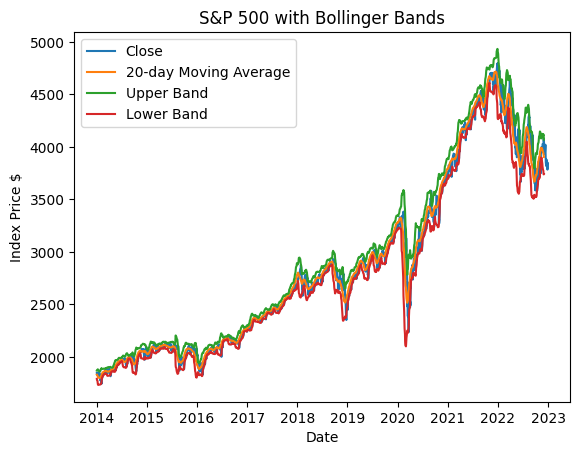

In [50]:
# Plot daily closing prices
plt.plot(SP_Data['Date'], SP_Data['Close/Last'], label='Close')

# Plot 20-day moving average
plt.plot(SP_Data['Date'], SP_Data['Moving Average - 20 day'], label = '20-day Moving Average')

# Plot upper and lower Bollinger Bands
plt.plot(SP_Data['Date'], SP_Data['Upper Bollinger Band'], label = 'Upper Band')
plt.plot(SP_Data['Date'], SP_Data['Lower Bollinger Band'], label = 'Lower Band')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Index Price $')
plt.title('S&P 500 with Bollinger Bands')
plt.legend()

plt.show()

We notice that this plot is hard to see, so we will build a plot for each year, where it will be easier to visually interpret:

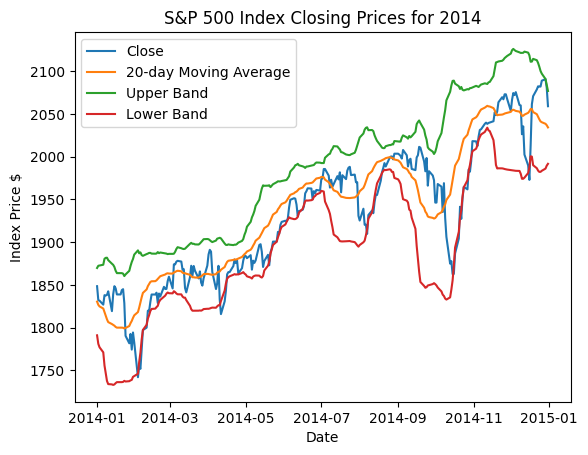

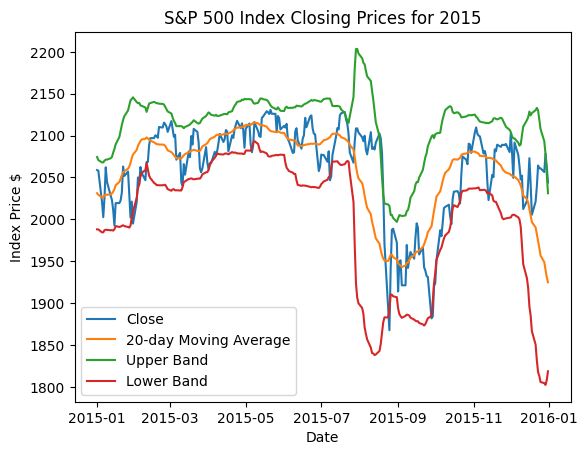

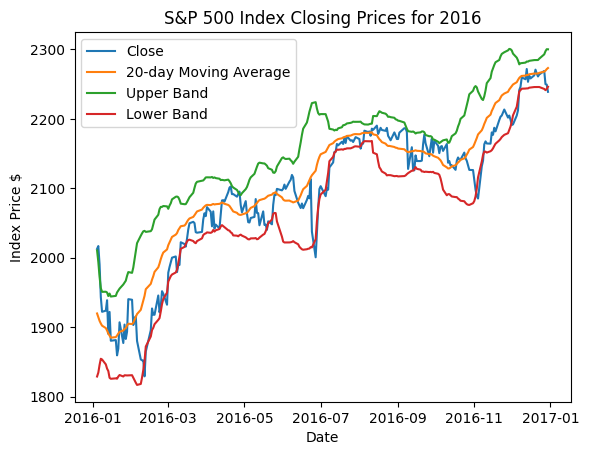

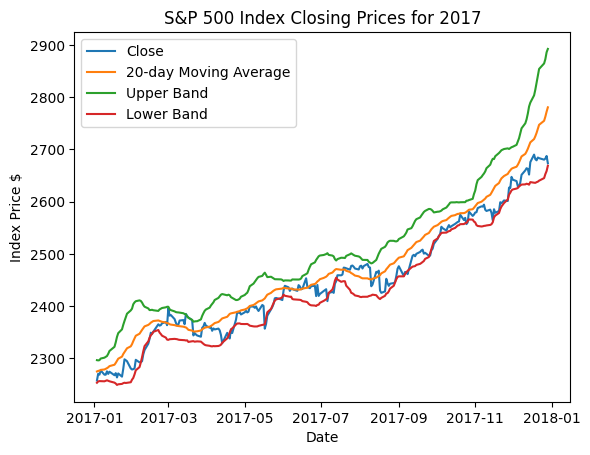

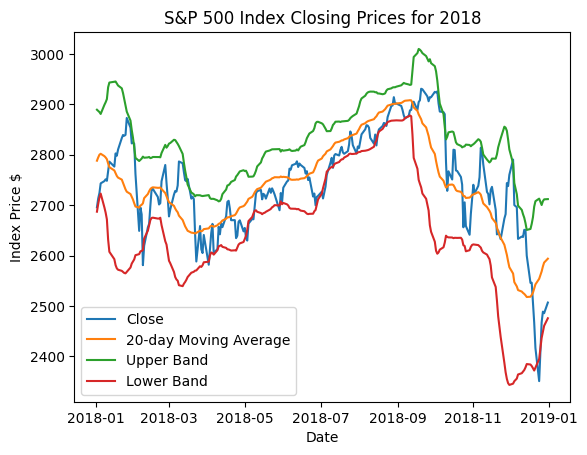

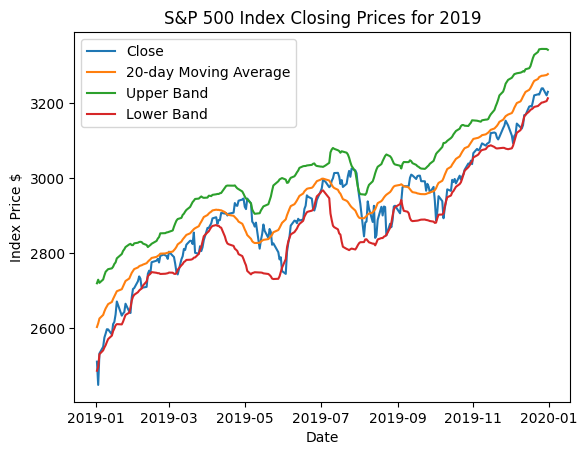

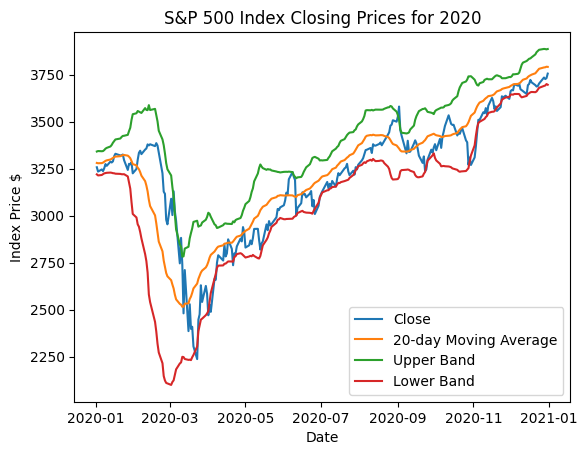

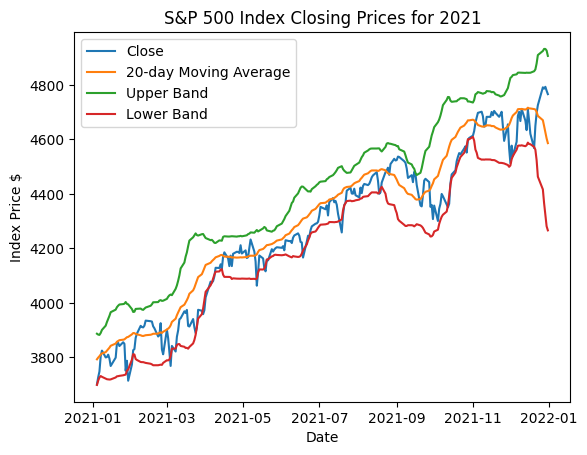

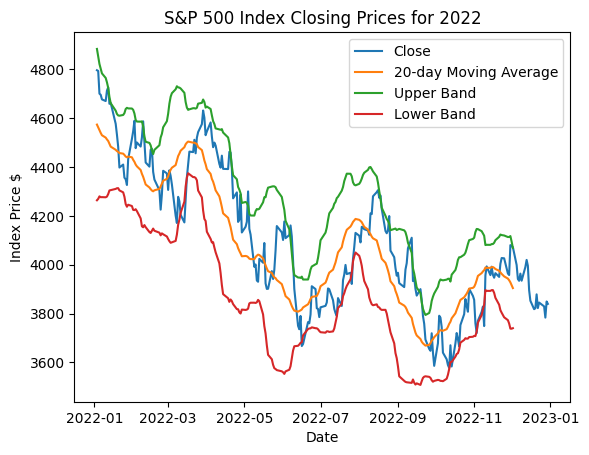

In [49]:
# Group the data by the year
SP_Data_grouped = SP_Data.groupby(SP_Data['Date'].dt.year)

# Loop through each year and plot the data
for year, data in SP_Data_grouped:
    plt.figure()
    plt.title(f"S&P 500 Index Closing Prices for {year}")
    plt.plot(data['Date'], data['Close/Last'], label='Close')
    plt.plot(data['Date'], data['Moving Average - 20 day'], label='20-day Moving Average')
    plt.plot(data['Date'], data['Upper Bollinger Band'], label='Upper Band')
    plt.plot(data['Date'], data['Lower Bollinger Band'], label='Lower Band')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Index Price $')
    plt.show()